In [1]:
# imports 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Import label encoder 
from sklearn.preprocessing import LabelEncoder

# importing standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for train-test split
from sklearn.model_selection import train_test_split

# importing models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# performance metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# importing dataset
train = pd.read_csv("/kaggle/input/ipba14-grade-ml-case-study-classification-17042023/train.csv")
test = pd.read_csv("/kaggle/input/ipba14-grade-ml-case-study-classification-17042023/test.csv")
submission = pd.read_csv("/kaggle/input/ipba14-grade-ml-case-study-classification-17042023/sample_submission.csv")

# 2. 	Check Descriptive Statistics

In [3]:
print(train.shape)
print(test.shape)

(1677, 35)
(1119, 34)


In [4]:
# merging both train and test data by row, for preprocessing
merged_data = pd.concat([train, test], axis=0)
merged_data.shape

(2796, 35)

In [5]:
merged_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,2796.0,2796.000000,2796.000000,2796.000000,2796.000000,...,2796.0,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,1677.000000
mean,1397.500000,36.081187,889.067954,8.677396,2.939557,1.0,2.749285,67.969599,2.766094,1.998927,...,80.0,0.736409,10.699928,2.757868,2.765737,6.890916,4.160229,2.017883,4.235336,0.119261
std,807.280001,8.618459,371.249481,7.803284,1.028535,0.0,1.094669,19.457347,0.651687,1.086096,...,0.0,0.793699,7.252444,1.165865,0.651284,5.920152,3.562788,3.140543,3.638059,0.324192
min,0.000000,18.000000,6.000000,1.000000,1.000000,1.0,0.000000,30.000000,0.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,698.750000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,1397.500000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,2096.250000,41.000000,1219.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,2795.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,4.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2796 entries, 0 to 1118
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2796 non-null   int64  
 1   Age                       2796 non-null   int64  
 2   BusinessTravel            2796 non-null   object 
 3   DailyRate                 2796 non-null   int64  
 4   Department                2796 non-null   object 
 5   DistanceFromHome          2796 non-null   int64  
 6   Education                 2796 non-null   int64  
 7   EducationField            2796 non-null   object 
 8   EmployeeCount             2796 non-null   int64  
 9   EnvironmentSatisfaction   2796 non-null   int64  
 10  Gender                    2796 non-null   object 
 11  HourlyRate                2796 non-null   int64  
 12  JobInvolvement            2796 non-null   int64  
 13  JobLevel                  2796 non-null   int64  
 14  JobRole 

# 3	Data Cleaning & Prep - Identify and Treat Missing Categorical features

In [7]:
# Some of the factors are read as int while they should be categorical, 
# so, converting such datatype to categorical. 
int_to_object = ["Education","EmployeeCount","EnvironmentSatisfaction","StandardHours","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalance",
                "JobInvolvement","JobLevel","JobSatisfaction","NumCompaniesWorked",'RelationshipSatisfaction', 'Attrition','PerformanceRating']

for i in int_to_object:
    #print(merged_data[i].value_counts())
    merged_data[i] = merged_data[i].astype('object')

# getting categorical and numerical features 
categorical_features = merged_data.select_dtypes(exclude='number').columns.tolist()
numerical_features = merged_data.select_dtypes(include='number').columns.tolist()

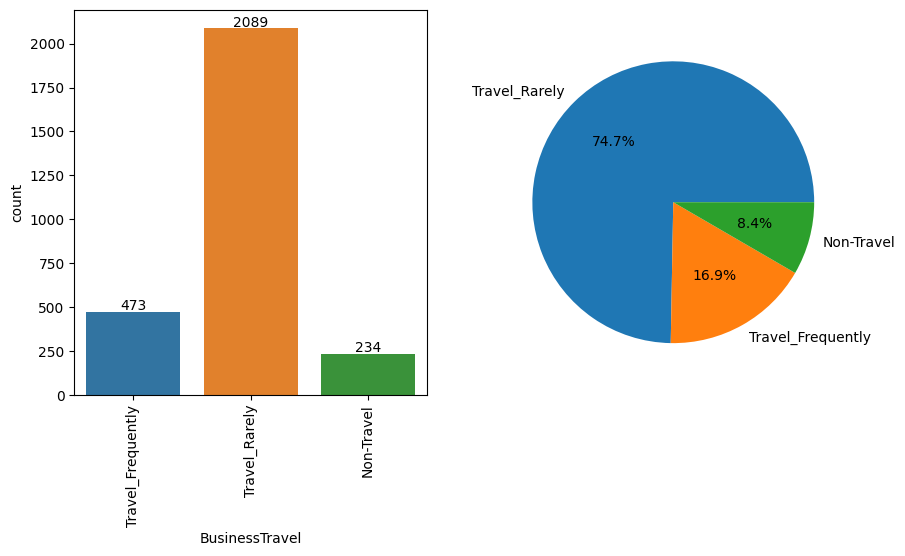

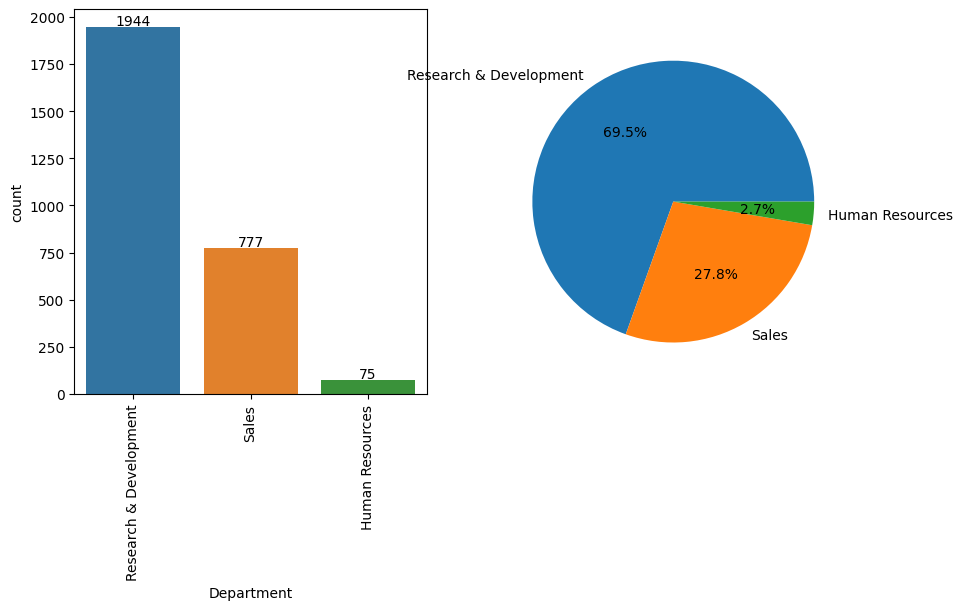

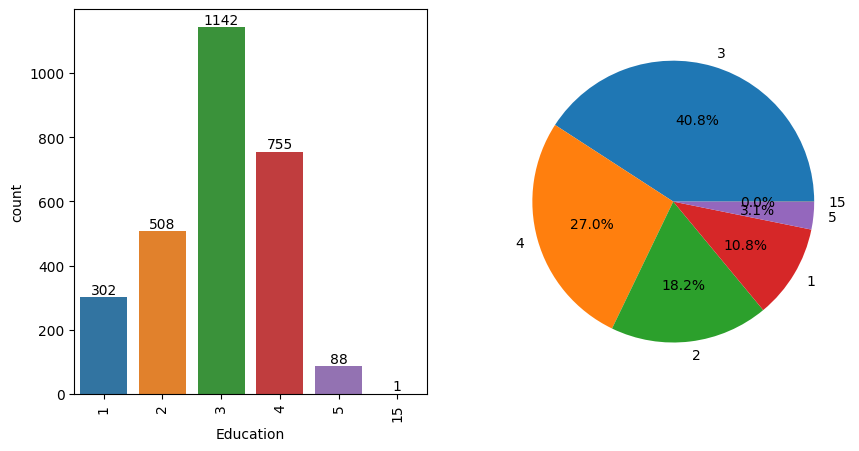

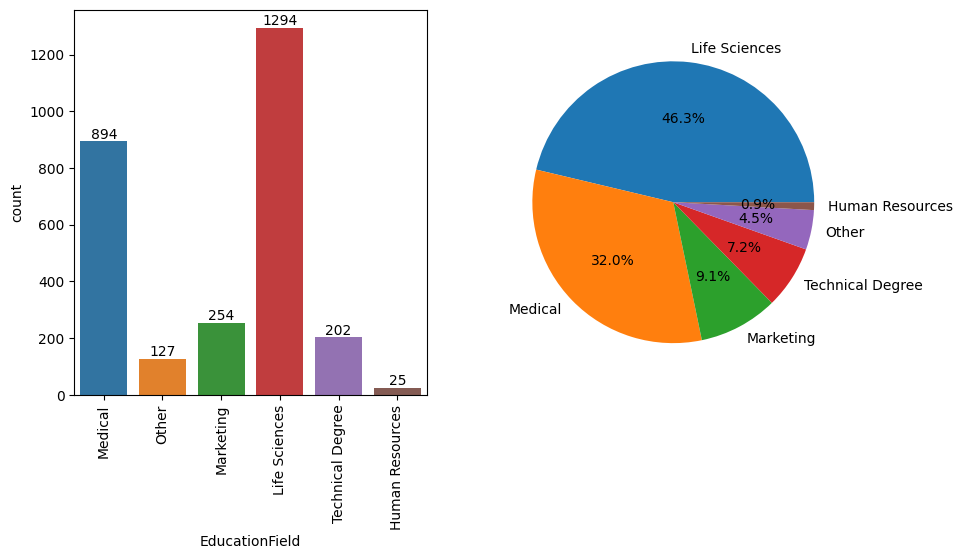

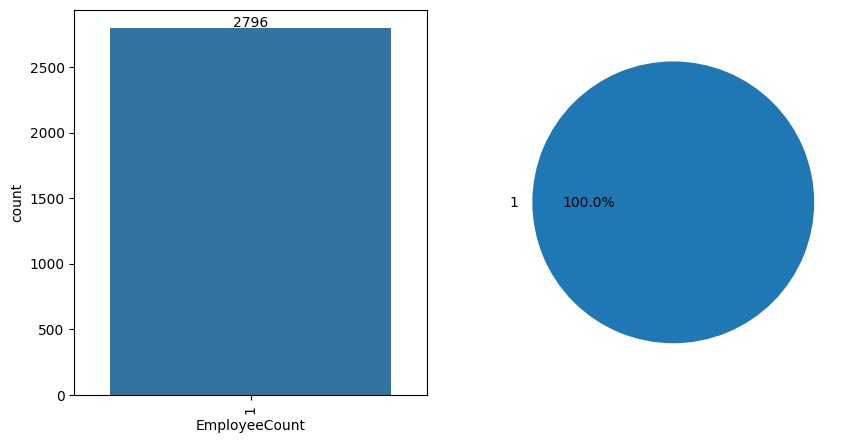

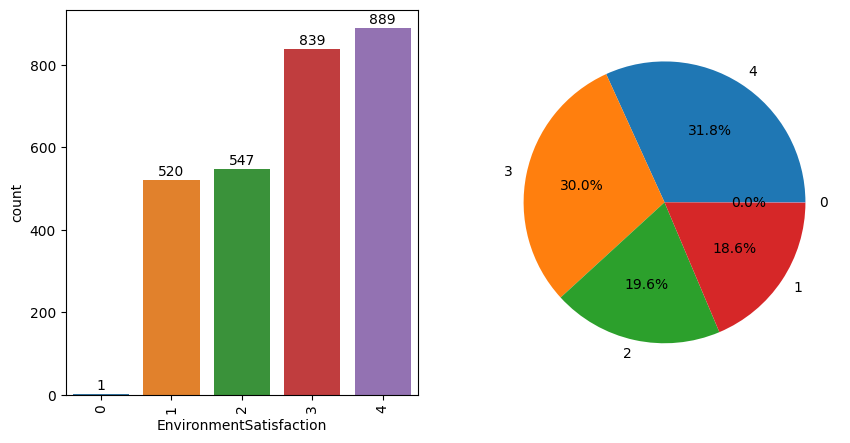

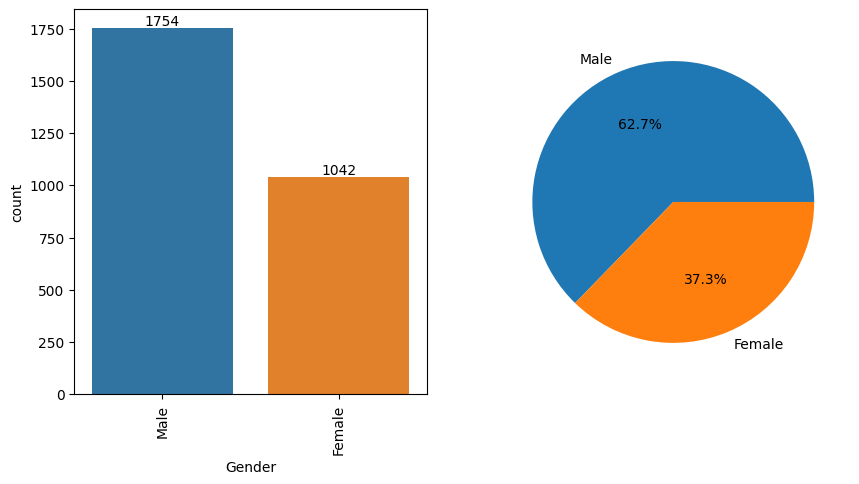

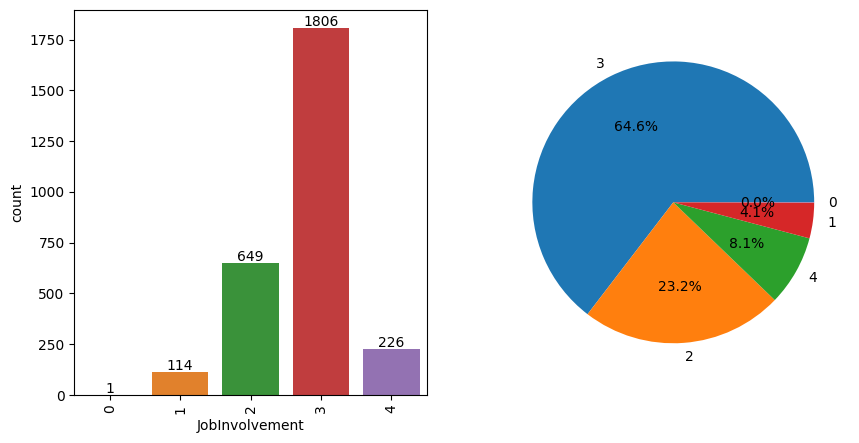

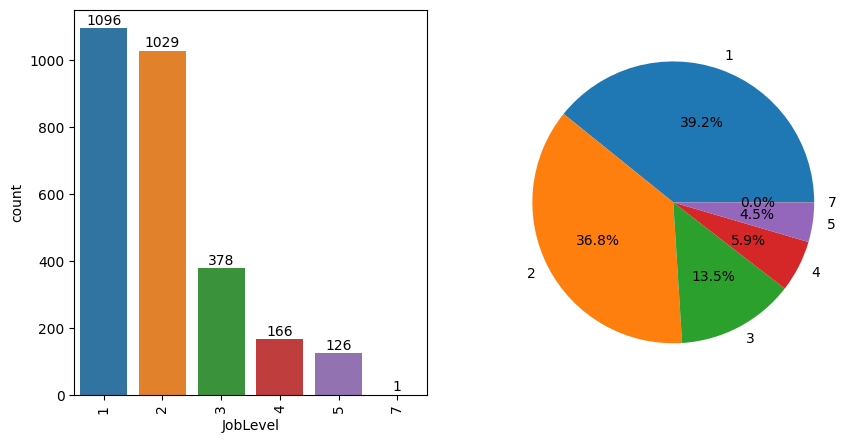

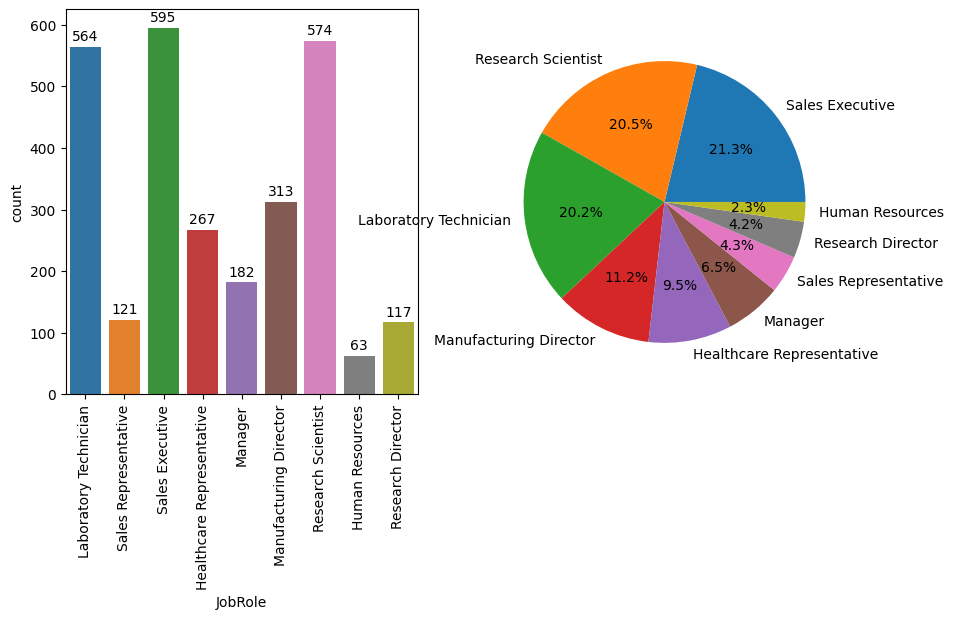

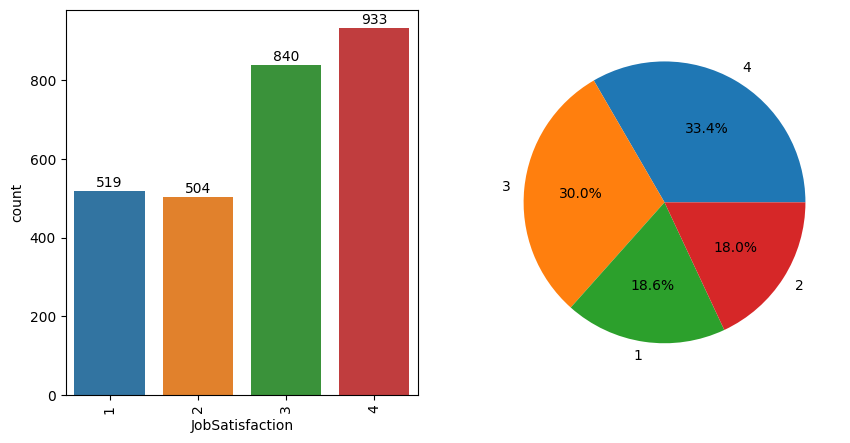

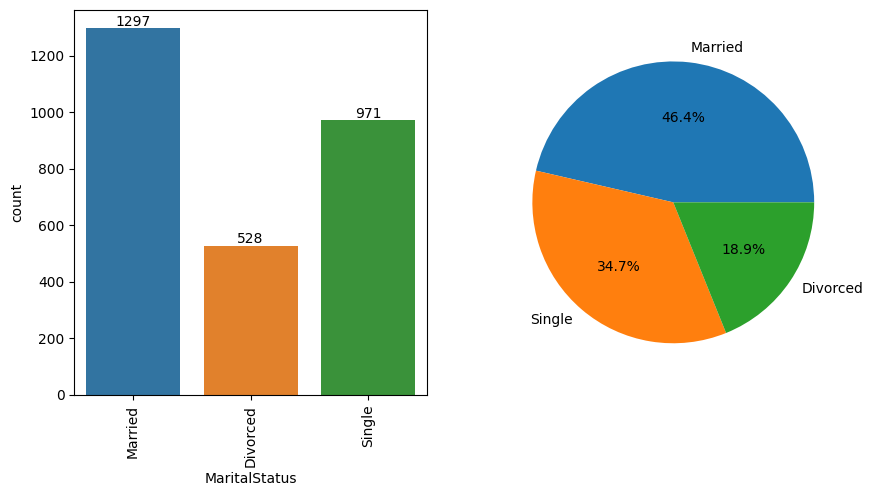

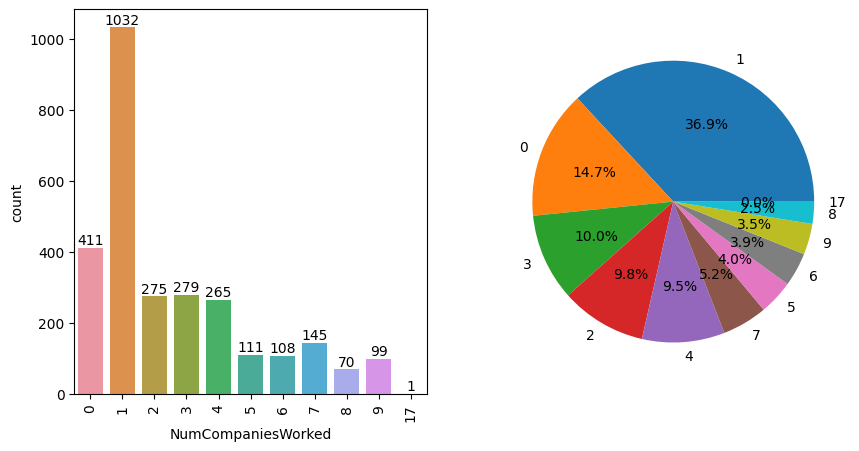

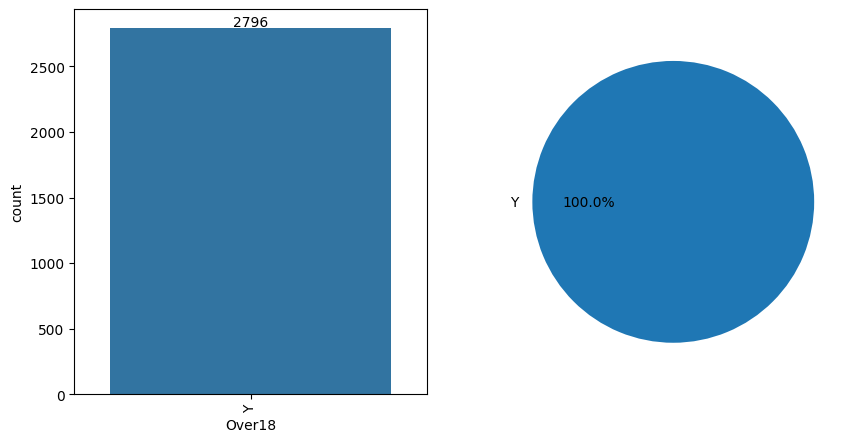

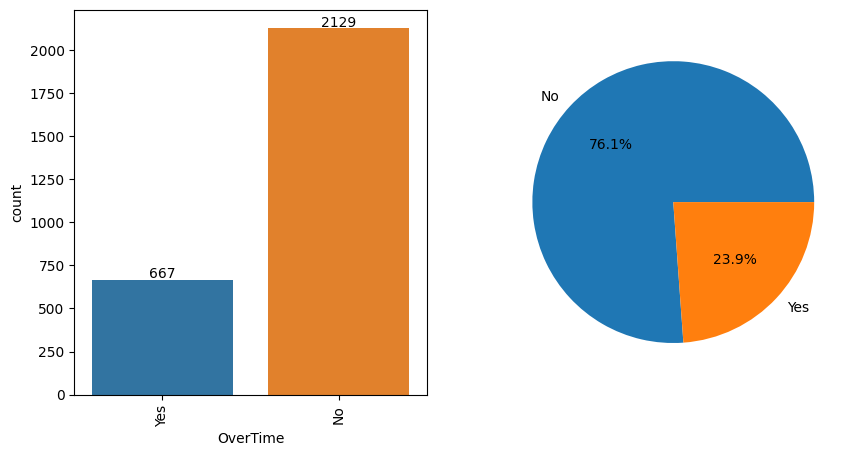

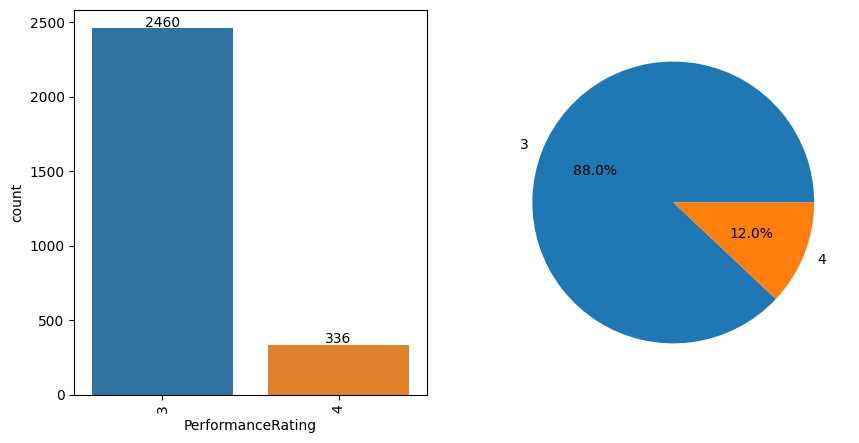

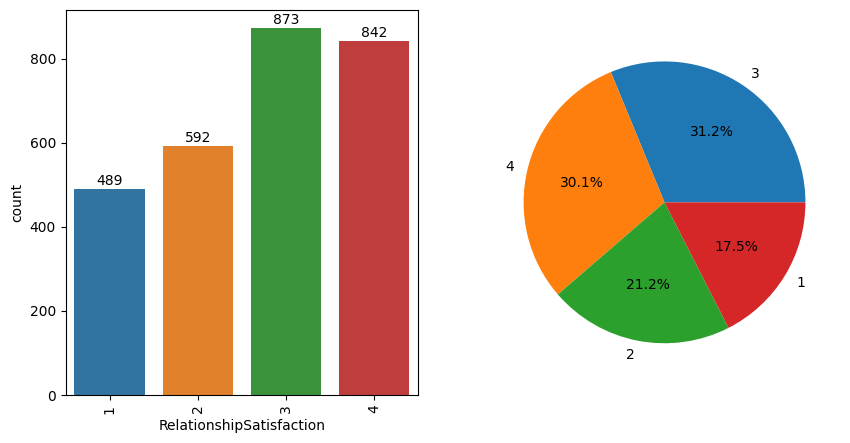

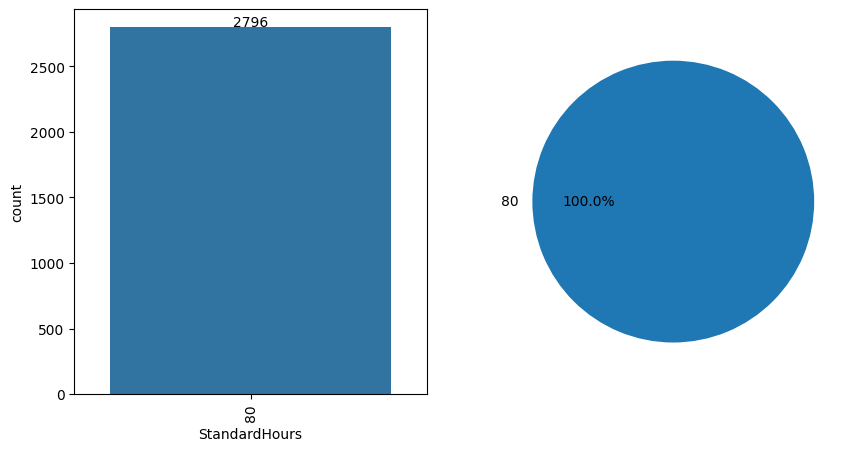

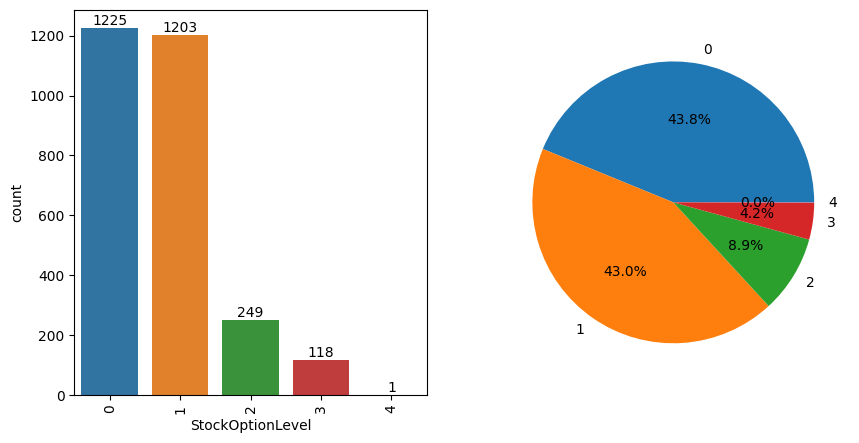

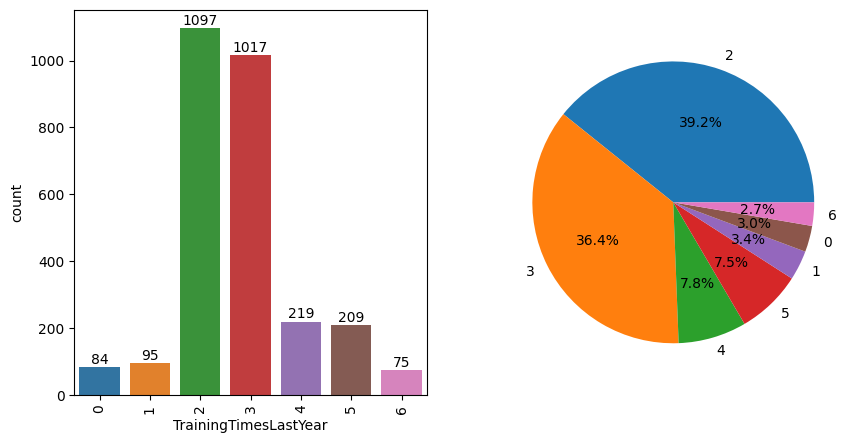

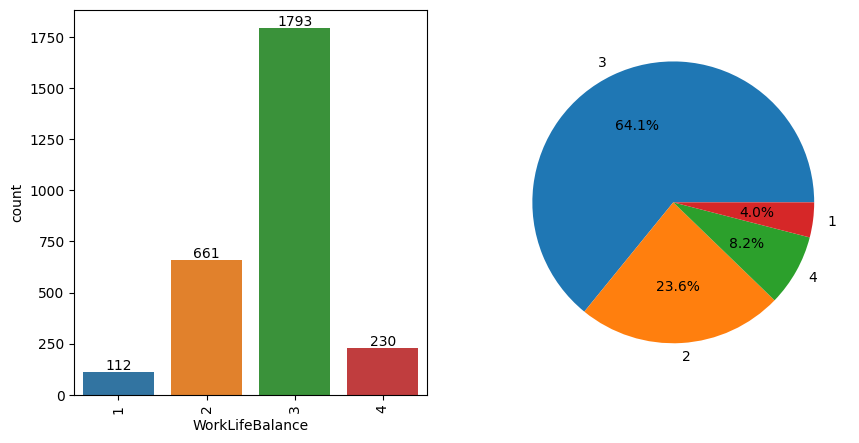

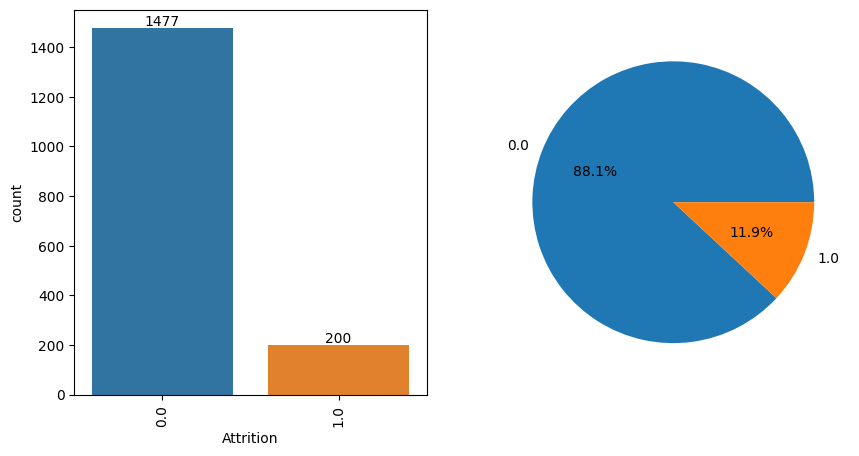

In [8]:
# ploting the categorical variables

for var in categorical_features:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    
    # plotting bar/count plot 
    ax = sns.countplot(x=var, data=merged_data)
    # getting label for each column/bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 10, int(height), ha="center")
        plt.xticks(rotation=90)
    
    # plotting pie chart
    plt.subplot(1,2,2)
    plt.pie(merged_data[var].value_counts(),autopct='%1.1f%%',labels=merged_data[var].value_counts().keys())
    plt.show()
    

Observation from the plot of categorical variables: 
> Education: only one observation for '15'

> EnvironmentSatisfaction : '0' does not fits well

> StockOptionLevel : 1 observation for '4'

> JobInvolvement: 1 observation for '0'

> JobLevel: 1 observation for '7'

> NumCompaniesWorked: 1 observatio for '17'

Hence, treated them by replacing with nearest entry


*factors that are homogenous can be removed.*
> ["id", "EmployeeCount", "StandardHours", "Over18"]


In [9]:
# dropping columns that are homogenous, make no sense of using them 
merged_data.drop(["id","EmployeeCount","StandardHours","Over18"], axis=1,inplace=True)

# Handling the categorical variables.
merged_data['Education'] = merged_data['Education'].apply(lambda x: 5 if x>5 else x)
merged_data['EnvironmentSatisfaction'] = merged_data['EnvironmentSatisfaction'].apply(lambda x: 1 if x==0 else x)
merged_data['StockOptionLevel'] = merged_data['StockOptionLevel'].apply(lambda x: 3 if x==4 else x)
merged_data['JobInvolvement'] = merged_data['JobInvolvement'].apply(lambda x: 1 if x==0 else x)
merged_data['JobLevel'] = merged_data['JobLevel'].apply(lambda x: 5 if x==7 else x)
merged_data['NumCompaniesWorked'] = merged_data['NumCompaniesWorked'].apply(lambda x: 8 if x==17 else x)

# 4	Data Cleaning & Prep - Identify features with less than 10 values (Low Cardinality)

In [10]:
low_car = []
for col in merged_data.columns:
    #print(col,'->',merged_data[col].nunique())
    if merged_data[col].nunique() < 10:
        low_car.append(col)
        
print(low_car)

['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition']


# 5	Data Cleaning & Prep - Identify features with more than values (High Cardinality)

In [11]:
high_car = []
for col in merged_data.columns:
    if col not in low_car:
        high_car.append(col)
        
print(high_car)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# 6	Data Cleaning & Prep - Encode Low Cardinality with One Hot Encoding

# 7	Data Cleaning & Prep - Encode High Cardinality with Ordinal Encoding

In [12]:
# Encoding ordinal and nominal categoriacal variables.

categorical_features = merged_data.select_dtypes(exclude='number').columns.tolist()
numerical_features = merged_data.select_dtypes(include='number').columns.tolist()

# ORDINAL ---------------
label_cat = ['Education',"EnvironmentSatisfaction", 'JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked',
             'RelationshipSatisfaction','TrainingTimesLastYear','WorkLifeBalance','PerformanceRating','Attrition']

# label_encoder for factors that are ordinal 
label_encoder = LabelEncoder()

# Encode labels for each column. 
for cat in label_cat:
    merged_data[cat]= label_encoder.fit_transform(merged_data[cat]) 


# NOMINAL ---------------
dropped = ["id","EmployeeCount","StandardHours","Over18"]
ohe_cat = []
for cat in categorical_features:
    if cat not in label_cat:
        ohe_cat.append(cat)

# getting dummies 
cat_encoded = pd.get_dummies(merged_data[ohe_cat],drop_first=True)
merged_data = pd.concat([merged_data,cat_encoded], axis=1)

# Remove columns that are dummified 
merged_data.drop(ohe_cat, axis=1, inplace=True)

In [13]:
print(ohe_cat)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


scaling continuous variables

In [14]:
# using standard scaler 
# scaler = StandardScaler()
# merged_data[numerical_features] = scaler.fit_transform(merged_data[numerical_features])

# using MinMaxScaler
min_max_scale = MinMaxScaler()
merged_data[numerical_features] = min_max_scale.fit_transform(merged_data[numerical_features])

# 8	Code to perform train & test split

In [15]:
# Separating the train and test data from the merged_data into train_new and test_new

# Get the number of rows in the train_df
num_train_rows = train.shape[0]

# Split the merged_df back into train and test dataframes
train_new = merged_data.iloc[:num_train_rows, :]
test_new = merged_data.iloc[num_train_rows:, :]

test_new=test_new.drop('Attrition', axis=1)

In [16]:
# Split the dataset into training and validation sets

x = train_new.drop('Attrition', axis=1)
y = train_new['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 9	Write a code to build Logistic Regression Model + checking performance using classification metrics

In [17]:
# Train a for logisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nprecision: ",precision_score(y_test, y_pred))
print("\nconfusion_matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy: 0.753968253968254

precision:  0.31446540880503143

confusion_matrix: 
 [[330 109]
 [ 15  50]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 10	Write a code to build Decision Tree Model + checking performance using classification metrics

In [18]:
# fit the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# make predictions
y_pred = dt.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nprecision: ",precision_score(y_test, y_pred))
print("\nconfusion_matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy: 0.8253968253968254

precision:  0.2982456140350877

confusion_matrix: 
 [[399  40]
 [ 48  17]]


# 11	Write a code to build Random Forest Model + checking performance using classification metrics

In [19]:
# fit the model
clf = RandomForestClassifier(n_estimators=100,random_state=400)
clf.fit(x_train, y_train)

# make predictions on new data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nprecision: ",precision_score(y_test, y_pred))
print("\nconfusion_matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy: 0.878968253968254

precision:  0.8333333333333334

confusion_matrix: 
 [[438   1]
 [ 60   5]]


# 12	Choose the best model and build model again
# 13	Predict on train, test and submission data using this Model

In [20]:
# Split the dataset to get x and y
x = train_new.drop('Attrition', axis=1)
y = train_new['Attrition']

In [21]:
#RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=400)
clf.fit(x, y)

# make predictions on new data
y_test_pred = clf.predict(test_new)

submission['Attrition']= y_test_pred
submission['Attrition'].value_counts()

0    1093
1      26
Name: Attrition, dtype: int64

In [22]:
# LogisticRegression - building model again on given train to predict given test.
model = LogisticRegression(class_weight='balanced')
model.fit(x, y)

# Make predictions on the testing set
y_test_pred = model.predict(test_new)

submission['Attrition']= y_test_pred
submission['Attrition'].value_counts()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    789
1    330
Name: Attrition, dtype: int64

In [23]:
submission.to_csv('submission.csv', index=False)